In [38]:
import pandas as pd
import glob
import altair as alt
import matplotlib.pyplot as plt

In [39]:
# Get all xlsx files in the current directory
excel_files = glob.glob('*.xlsx')

# Initialize an empty list to store dataframes
dfs = []

# Columns to extract
columns_to_extract = ['TIME', 'TBLD', 'PWR', 'WFWA', 'WSTA', 'LSGA', 'P', 'TPCT', 'TFPK', 'CNH2']

# Read each excel file
for file in excel_files:
    try:
        # Read the excel file
        df = pd.read_excel(file)
        
        # Only keep the specified columns if they exist
        existing_columns = [col for col in columns_to_extract if col in df.columns]
        df = df[existing_columns]
        
        # Add filename as a column to track source
        df['source_file'] = file
        
        dfs.append(df)
    except Exception as e:
        print(f"Error reading {file}: {str(e)}")

# Combine all dataframes
if dfs:
    combined_df = pd.concat(dfs, ignore_index=True)
    print("Shape of combined DataFrame:", combined_df.shape)
    print("\nColumns in combined DataFrame:", combined_df.columns.tolist())
else:
    print("No valid Excel files found with the specified columns.")

Shape of combined DataFrame: (1815, 11)

Columns in combined DataFrame: ['TIME', 'TBLD', 'PWR', 'WFWA', 'WSTA', 'LSGA', 'P', 'TPCT', 'TFPK', 'CNH2', 'source_file']


In [40]:
combined_df

,TIME,TBLD,PWR,WFWA,WSTA,LSGA,P,TPCT,TFPK,CNH2,source_file
0,0.0,100.000000,100.000000,1773.171143,1773.171143,11.830001,155.000000,544.950012,788.900024,0.000000,Percobaan 1.xlsx
1,5.0,100.000000,100.324478,1774.414673,1773.171143,11.830495,154.953812,545.686584,790.428162,0.000000,Percobaan 1.xlsx
2,10.0,99.249702,100.545631,1773.436035,1759.867188,11.832209,154.959198,546.245178,791.526245,0.000000,Percobaan 1.xlsx
3,15.0,98.416031,100.125214,1768.855591,1745.084717,11.836866,154.980667,545.269104,789.524536,0.000000,Percobaan 1.xlsx
4,20.0,97.582367,99.631882,1763.243530,1730.302246,11.843824,154.994247,544.108154,787.160095,0.000000,Percobaan 1.xlsx
...,...,...,...,...,...,...,...,...,...,...,...
1810,6585.0,0.000000,3.726228,0.000000,0.824714,0.015054,220.641327,1073.864868,1787.729858,3.796587,Percobaan 3.xlsx
1811,6590.0,0.000000,3.599312,0.000000,0.000000,0.014922,219.226471,1071.797607,1783.595093,3.838427,Percobaan 3.xlsx
1812,6595.0,0.000000,3.618366,0.000000,0.000000,0.014790,217.859833,1069.903320,1779.806641,3.880051,Percobaan 3.xlsx
1813,6600.0,0.000000,3.629324,0.000000,0.000000,0.014790,216.490967,1068.061768,1776.123657,3.922270,Percobaan 3.xlsx


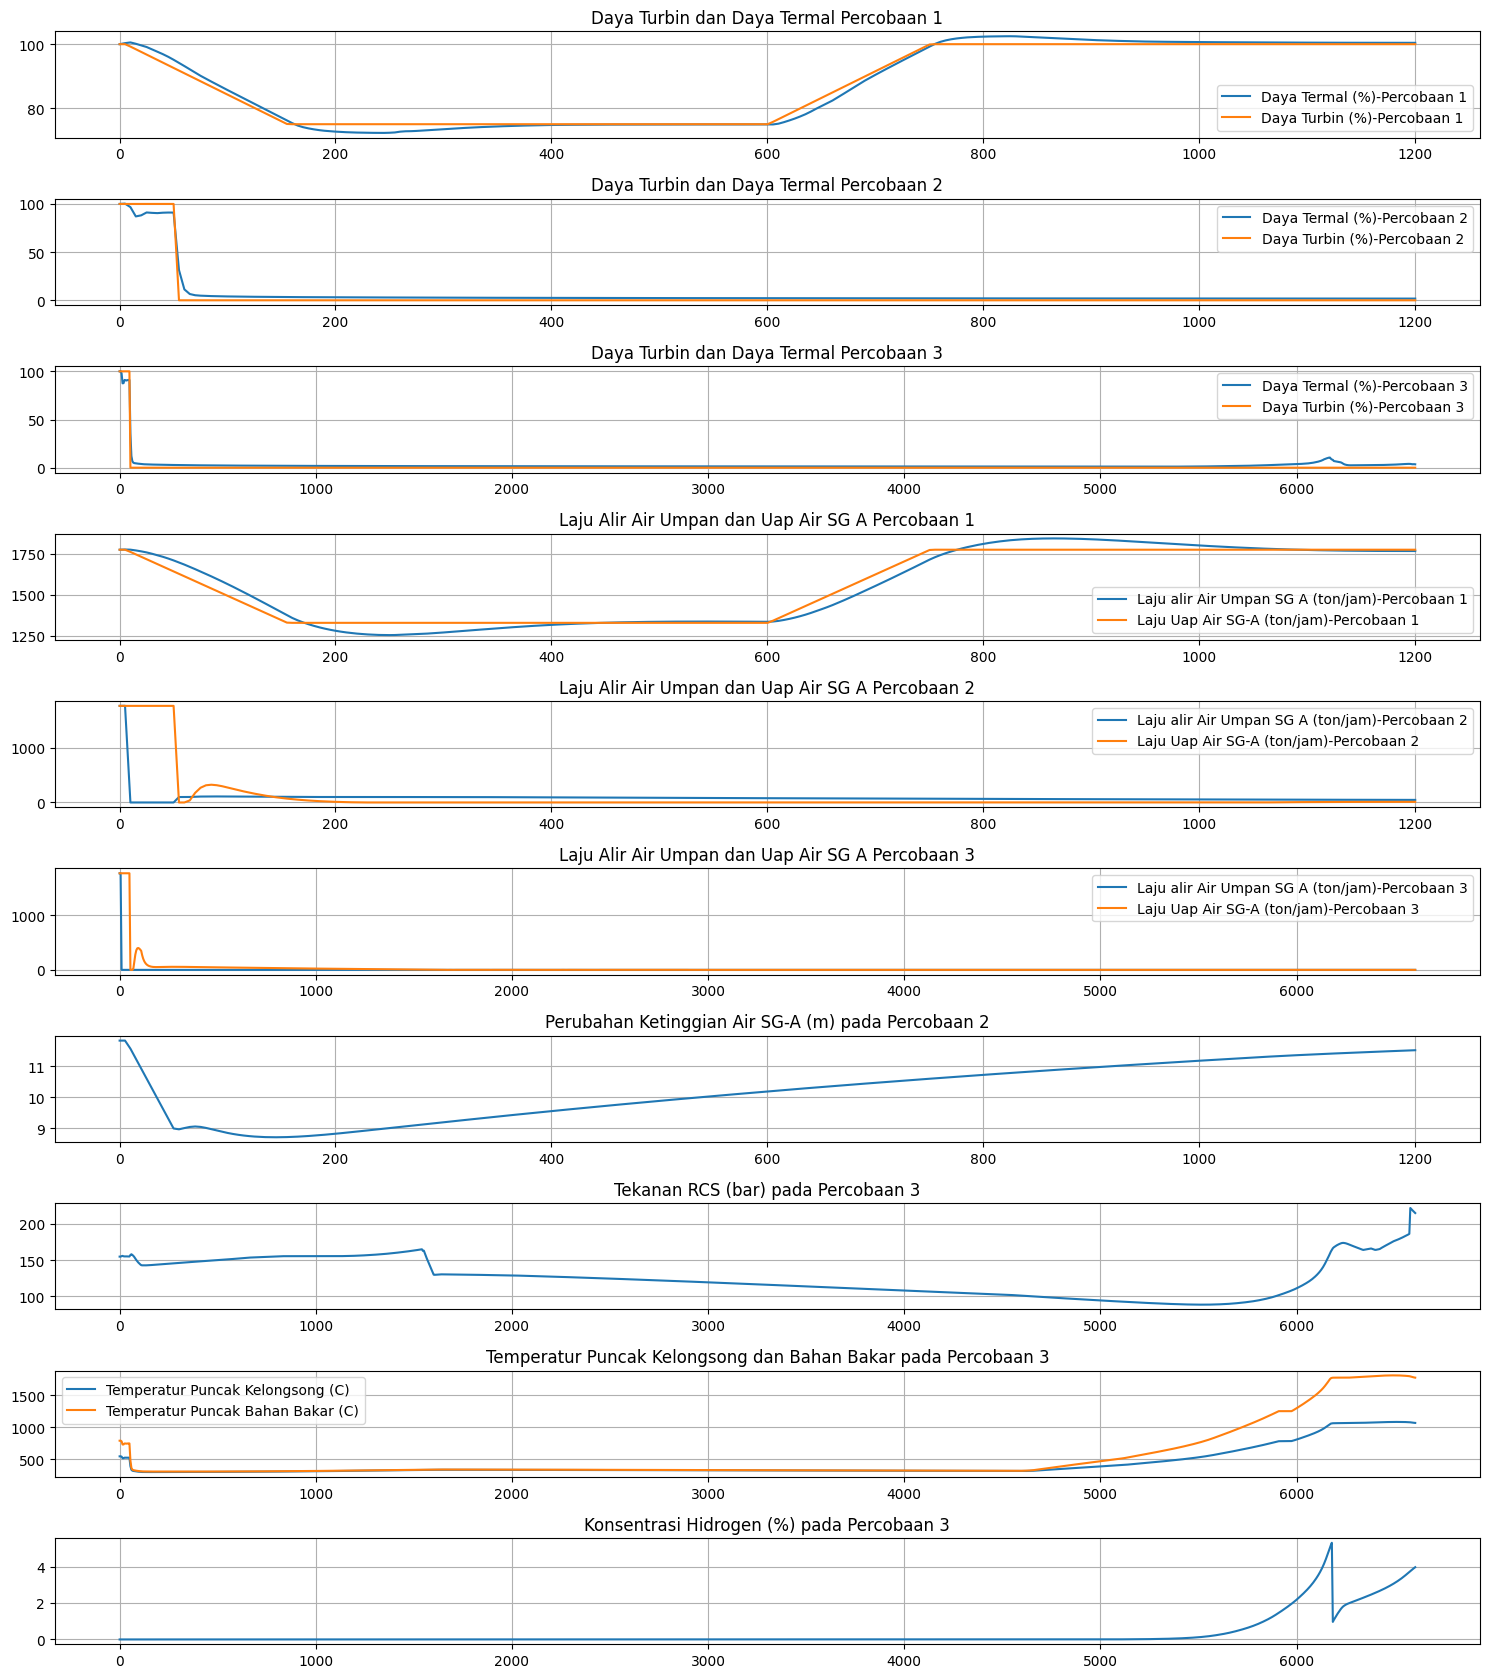

In [41]:
# Create figure with subplots
plt.figure(figsize=(15, 20))
n_excelfiles = len(excel_files)
# 1. Plot PWR and TBLD for each experiment
for i, file in enumerate(excel_files, 1):
    plt.subplot(6+2*n_excelfiles, 1, i)
    data = combined_df[combined_df['source_file'] == file]
    plt.plot(data.TIME, data['PWR'], label=f'Daya Termal (%)-{file[:-5]}')
    plt.plot(data.TIME, data['TBLD'], label=f'Daya Turbin (%)-{file[:-5]}')
    plt.legend()
    plt.title(f'Daya Turbin dan Daya Termal {file[:-5]}')
    plt.grid(True)

# 2. Plot WFWA and WSTA for each experiment
for i, file in enumerate(excel_files, 1):
    plt.subplot(6+2*n_excelfiles, 1, n_excelfiles+i)
    data = combined_df[combined_df['source_file'] == file]
    plt.plot(data.TIME, data['WFWA'], label=f'Laju alir Air Umpan SG A (ton/jam)-{file[:-5]}')
    plt.plot(data.TIME, data['WSTA'], label=f'Laju Uap Air SG-A (ton/jam)-{file[:-5]}')
    plt.title(f'Laju Alir Air Umpan dan Uap Air SG A {file[:-5]}')
    plt.legend()
    plt.grid(True)

# 3. Plot LSGA for experiment 2
plt.subplot(6+2*n_excelfiles, 1, 1+2*n_excelfiles)
data = combined_df[combined_df['source_file'] == 'Percobaan 2.xlsx']
plt.plot(data.TIME, data['LSGA'])
plt.title('Perubahan Ketinggian Air SG-A (m) pada Percobaan 2')
plt.grid(True)

# 4. Plot P for experiment 3
plt.subplot(6+2*n_excelfiles, 1, 2+2*n_excelfiles)
data = combined_df[combined_df['source_file'] == 'Percobaan 3.xlsx']
plt.plot(data.TIME, data['P'])
plt.title('Tekanan RCS (bar) pada Percobaan 3')
plt.grid(True)

# 5. Plot TPCT and TFPK for experiment 3
plt.subplot(6+2*n_excelfiles, 1, 3+2*n_excelfiles)
data = combined_df[combined_df['source_file'] == 'Percobaan 3.xlsx']
plt.plot(data.TIME, data['TPCT'], label='Temperatur Puncak Kelongsong (C)')
plt.plot(data.TIME, data['TFPK'], label='Temperatur Puncak Bahan Bakar (C)')
plt.title('Temperatur Puncak Kelongsong dan Bahan Bakar pada Percobaan 3')
plt.legend()
plt.grid(True)

# 6. Plot CNH2 for experiment 3
plt.subplot(6+2*n_excelfiles, 1, 4+2*n_excelfiles)
data = combined_df[combined_df['source_file'] == 'Percobaan 3.xlsx']
plt.plot(data.TIME, data['CNH2'])
plt.title('Konsentrasi Hidrogen (%) pada Percobaan 3')
plt.grid(True)

plt.tight_layout()
plt.show()

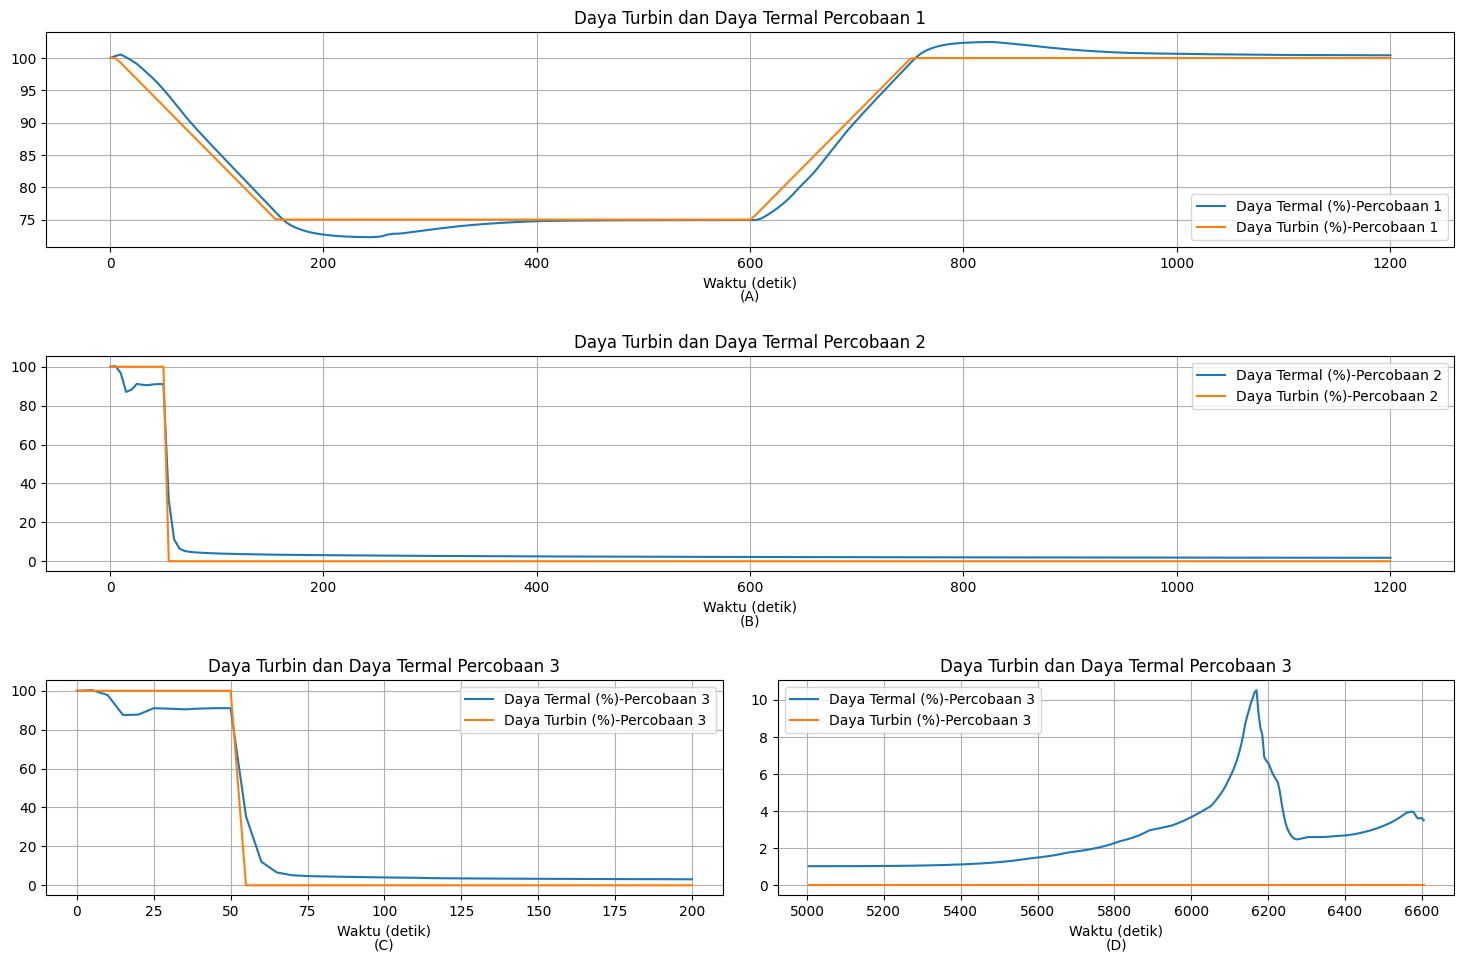

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

files = ['Percobaan 1.xlsx', 'Percobaan 2.xlsx', 'Percobaan 3.xlsx']
plt.figure(figsize=(15, 10))

# Plot A
file = files[0]
plt.subplot(3, 1, 1)
data = combined_df[combined_df['source_file'] == file]
plt.plot(data.TIME, data['PWR'], label=f'Daya Termal (%)-{file[:-5]}')
plt.plot(data.TIME, data['TBLD'], label=f'Daya Turbin (%)-{file[:-5]}')
plt.legend()
plt.title(f'Daya Turbin dan Daya Termal {file[:-5]}')
plt.text(0.5, -0.2, '(A)', ha='center', va='top', transform=plt.gca().transAxes) #Add (A) at bottom.
plt.xlabel('Waktu (detik)')
plt.grid(True)
# Plot B
file = files[1]
plt.subplot(3, 1, 2)
data = combined_df[combined_df['source_file'] == file]
plt.plot(data.TIME, data['PWR'], label=f'Daya Termal (%)-{file[:-5]}')
plt.plot(data.TIME, data['TBLD'], label=f'Daya Turbin (%)-{file[:-5]}')
plt.legend()
plt.title(f'Daya Turbin dan Daya Termal {file[:-5]}')
plt.text(0.5, -0.2, '(B)', ha='center', va='top', transform=plt.gca().transAxes) #Add (B) at bottom.
plt.xlabel('Waktu (detik)')
plt.grid(True)
# Plot C
file = files[2]
plt.subplot(3, 2, 5)
data = combined_df[combined_df['source_file'] == file]
data = data[(data['TIME'] <= 200)]
plt.plot(data.TIME, data['PWR'], label=f'Daya Termal (%)-{file[:-5]}')
plt.plot(data.TIME, data['TBLD'], label=f'Daya Turbin (%)-{file[:-5]}')
plt.legend()
plt.title(f'Daya Turbin dan Daya Termal {file[:-5]}')
plt.text(0.5, -0.2, '(C)', ha='center', va='top', transform=plt.gca().transAxes) #Add (C) at bottom.
plt.xlabel('Waktu (detik)')
plt.grid(True)
# Plot D
file = files[2]
plt.subplot(3, 2, 6)
data = combined_df[combined_df['source_file'] == file]
data = data[(data['TIME'] >= 5000)]
plt.plot(data.TIME, data['PWR'], label=f'Daya Termal (%)-{file[:-5]}')
plt.plot(data.TIME, data['TBLD'], label=f'Daya Turbin (%)-{file[:-5]}')
plt.legend()
plt.title(f'Daya Turbin dan Daya Termal {file[:-5]}')
plt.text(0.5, -0.2, '(D)', ha='center', va='top', transform=plt.gca().transAxes) #Add (D) at bottom
plt.xlabel('Waktu (detik)')

plt.grid(True)
plt.tight_layout(pad=2.0)
plt.show()

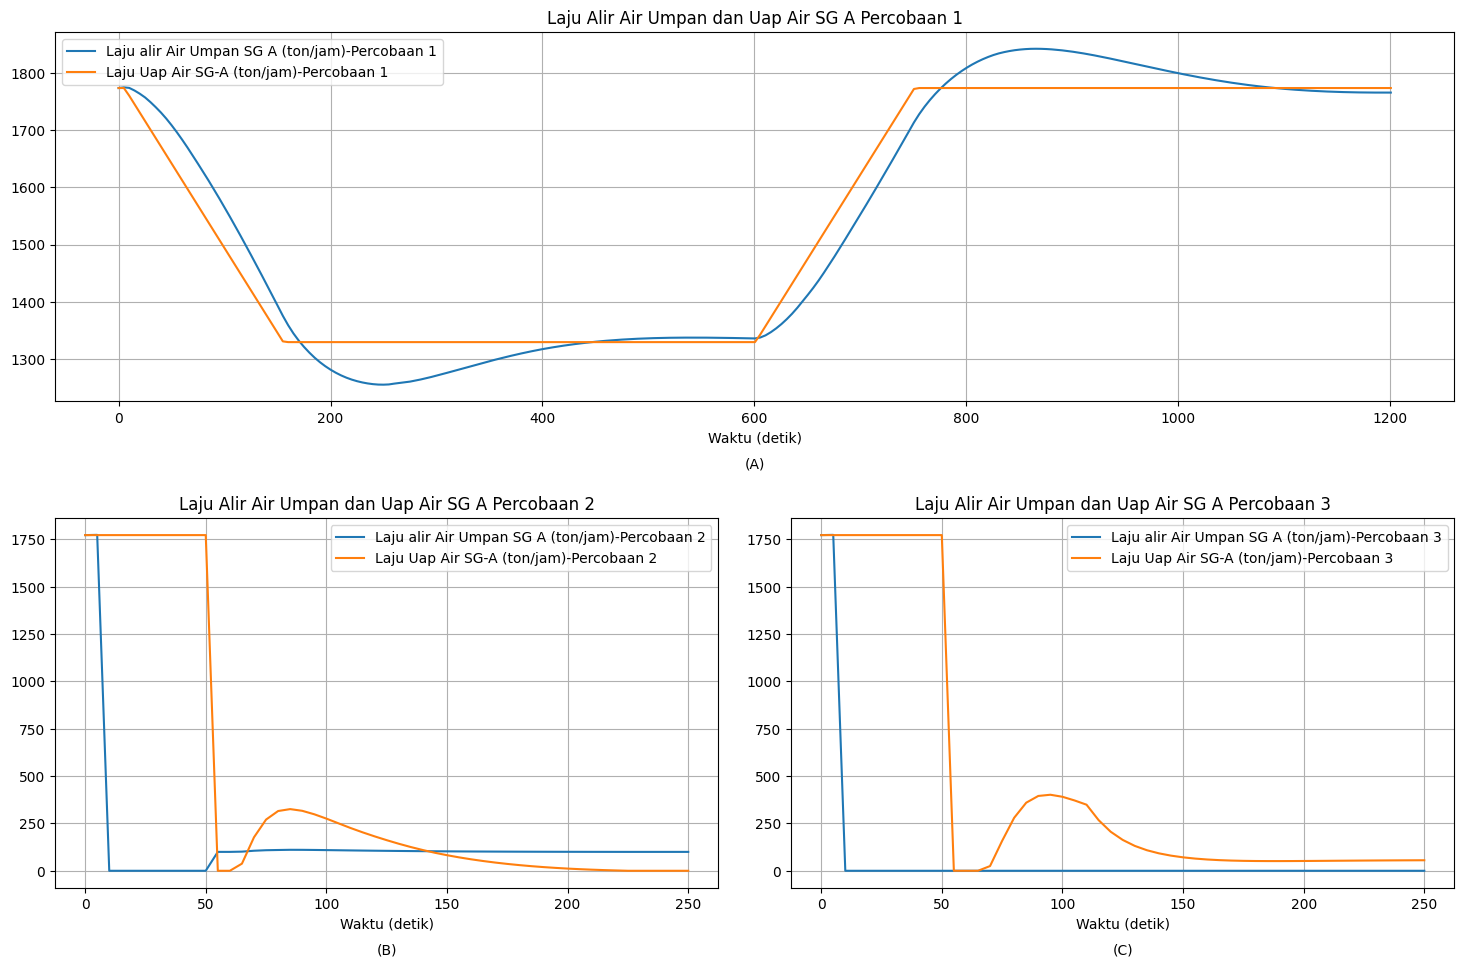

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

files = ['Percobaan 1.xlsx', 'Percobaan 2.xlsx', 'Percobaan 3.xlsx']
plt.figure(figsize=(15, 10))

# Plot A
file = files[0]
plt.subplot(2, 1, 1)
data = combined_df[combined_df['source_file'] == file]
plt.plot(data.TIME, data['WFWA'], label=f'Laju alir Air Umpan SG A (ton/jam)-{file[:-5]}')
plt.plot(data.TIME, data['WSTA'], label=f'Laju Uap Air SG-A (ton/jam)-{file[:-5]}')
plt.title(f'Laju Alir Air Umpan dan Uap Air SG A {file[:-5]}')
plt.legend()
plt.text(0.5, -0.15, '(A)', ha='center', va='top', transform=plt.gca().transAxes) #Add (A) at bottom.
plt.grid(True)
plt.xlabel('Waktu (detik)')
# Plot B
file = files[1]
plt.subplot(2, 2, 3)
data = combined_df[combined_df['source_file'] == file]
data = data[(data['TIME'] <= 250)]
plt.plot(data.TIME, data['WFWA'], label=f'Laju alir Air Umpan SG A (ton/jam)-{file[:-5]}')
plt.plot(data.TIME, data['WSTA'], label=f'Laju Uap Air SG-A (ton/jam)-{file[:-5]}')
plt.title(f'Laju Alir Air Umpan dan Uap Air SG A {file[:-5]}')
plt.legend()
plt.text(0.5, -0.15, '(B)', ha='center', va='top', transform=plt.gca().transAxes) #Add (B) at bottom.
plt.grid(True)
plt.xlabel('Waktu (detik)')
# Plot C
file = files[2]
plt.subplot(2, 2, 4)
data = combined_df[combined_df['source_file'] == file]
data = data[(data['TIME'] <= 250)]
plt.plot(data.TIME, data['WFWA'], label=f'Laju alir Air Umpan SG A (ton/jam)-{file[:-5]}')
plt.plot(data.TIME, data['WSTA'], label=f'Laju Uap Air SG-A (ton/jam)-{file[:-5]}')
plt.title(f'Laju Alir Air Umpan dan Uap Air SG A {file[:-5]}')
plt.legend()
plt.text(0.5, -0.15, '(C)', ha='center', va='top', transform=plt.gca().transAxes) #Add (C) at bottom.
plt.xlabel('Waktu (detik)')

plt.grid(True)
plt.tight_layout(pad=2.0)
plt.show()

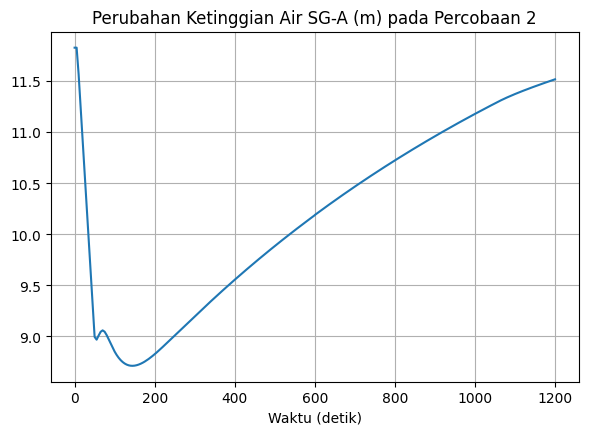

In [44]:
# 3. Plot LSGA for experiment 2
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
data = combined_df[combined_df['source_file'] == 'Percobaan 2.xlsx']
plt.plot(data.TIME, data['LSGA'])
plt.title('Perubahan Ketinggian Air SG-A (m) pada Percobaan 2')
plt.xlabel('Waktu (detik)')
plt.grid(True)


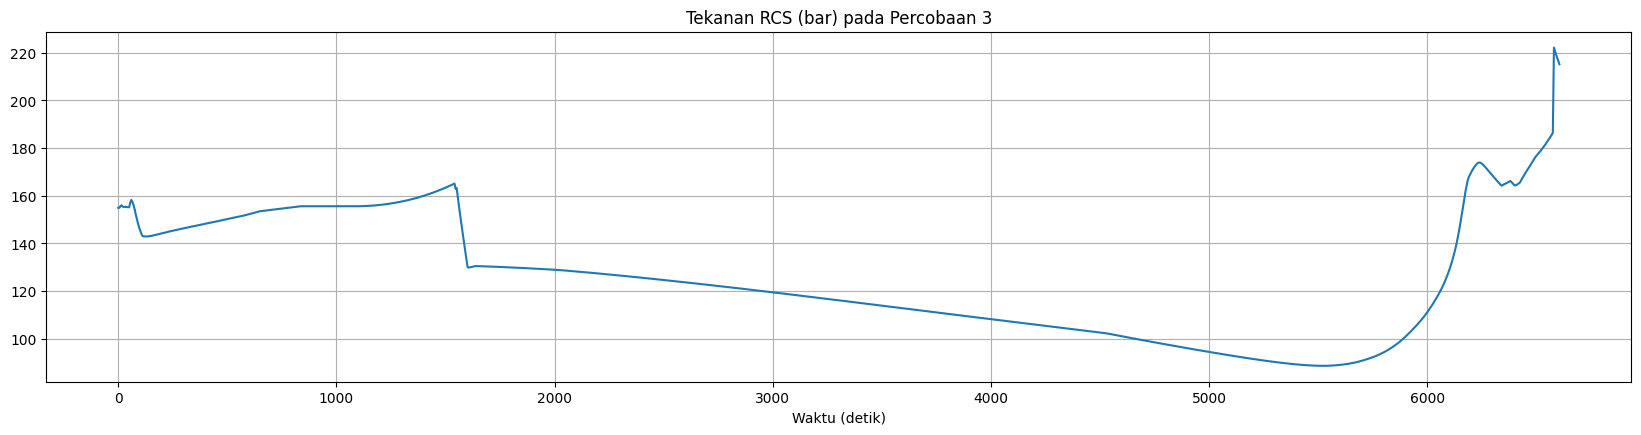

In [54]:
# 4. Plot P for experiment 3
plt.figure(figsize=(45, 10))
plt.subplot(2,2,1)
data = combined_df[combined_df['source_file'] == 'Percobaan 3.xlsx']
plt.plot(data.TIME, data['P'])
plt.title('Tekanan RCS (bar) pada Percobaan 3')
plt.xlabel('Waktu (detik)')
plt.grid(True)

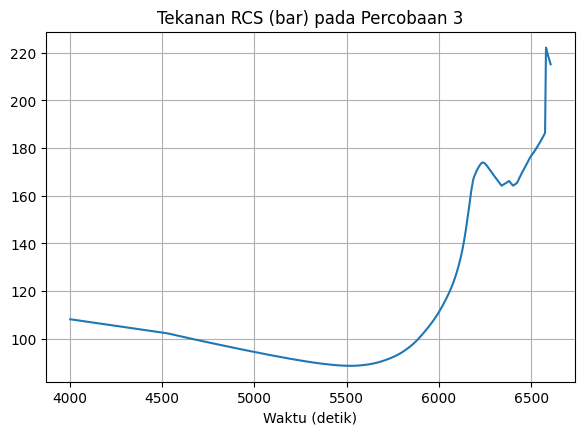

In [64]:
# 4. Plot P for experiment 3
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
data = combined_df[(combined_df['source_file'] == 'Percobaan 3.xlsx') & (combined_df['TIME'] >= 4000)]
plt.plot(data.TIME, data['P'])
plt.title('Tekanan RCS (bar) pada Percobaan 3')
plt.xlabel('Waktu (detik)')
plt.grid(True)

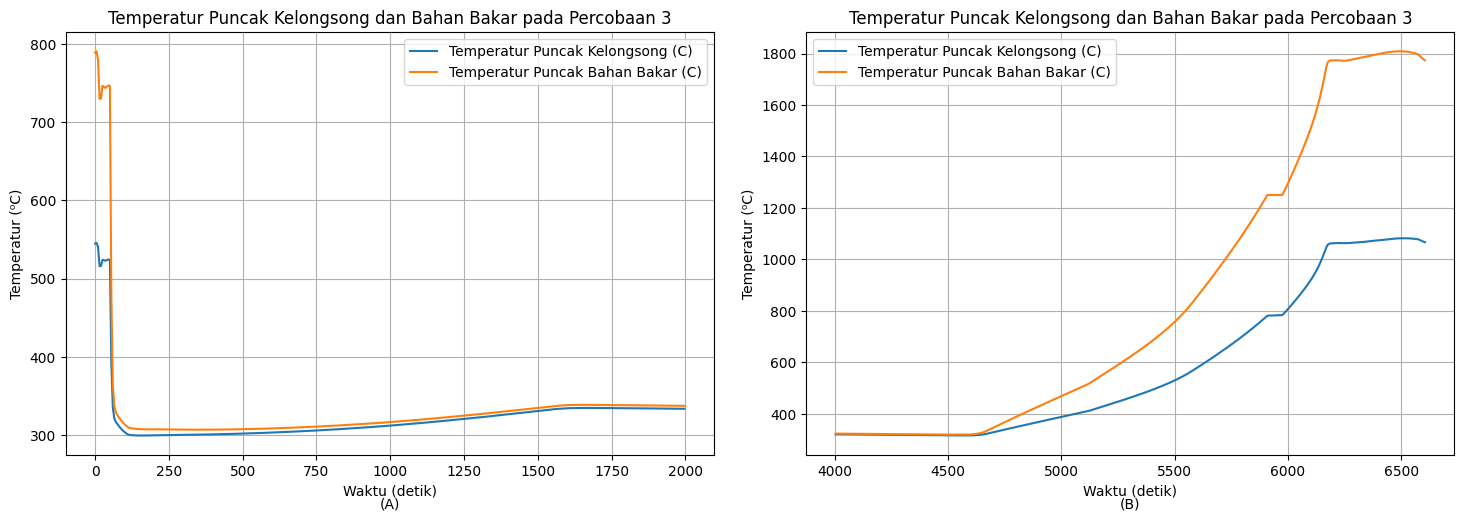

In [ ]:
# 5. Plot TPCT and TFPK for experiment 3
plt.figure(figsize=(15, 10))

plt.subplot(2,2,1)
data = combined_df[combined_df['source_file'] == 'Percobaan 3.xlsx']
data = data[(data['TIME'] <= 2000)]
plt.plot(data.TIME, data['TPCT'], label='Temperatur Puncak Kelongsong (C)')
plt.plot(data.TIME, data['TFPK'], label='Temperatur Puncak Bahan Bakar (C)')
plt.title('Temperatur Puncak Kelongsong dan Bahan Bakar pada Percobaan 3')
plt.legend()
plt.text(0.5, -0.1, '(A)', ha='center', va='top', transform=plt.gca().transAxes) #Add (B) at bottom.
plt.grid(True)
plt.xlabel('Waktu (detik)')
plt.ylabel('Temperatur (⁰C)')

plt.subplot(2,2,2)
data = combined_df[combined_df['source_file'] == 'Percobaan 3.xlsx']
data = data[(data['TIME'] >= 4000)]
plt.plot(data.TIME, data['TPCT'], label='Temperatur Puncak Kelongsong (C)')
plt.plot(data.TIME, data['TFPK'], label='Temperatur Puncak Bahan Bakar (C)')
plt.title('Temperatur Puncak Kelongsong dan Bahan Bakar pada Percobaan 3')
plt.legend()
plt.text(0.5, -0.1, '(B)', ha='center', va='top', transform=plt.gca().transAxes) #Add (B) at bottom.
plt.xlabel('Waktu (detik)')
plt.ylabel('Temperatur (⁰C)')

plt.tight_layout(pad=2.0)
plt.grid(True)

Text(0, 0.5, 'Konsentrasi hidrogen (%)')

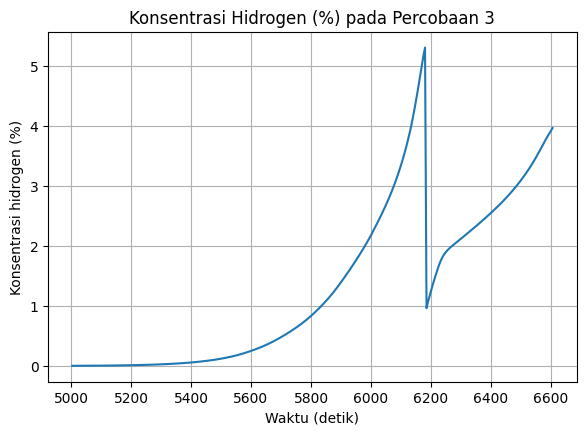

In [47]:


# 6. Plot CNH2 for experiment 3
plt.figure(figsize=(15, 10))

plt.subplot(2,2,1)
data = combined_df[combined_df['source_file'] == 'Percobaan 3.xlsx']
data = data[(data['TIME'] >= 5000)]
plt.plot(data.TIME, data['CNH2'])
plt.title('Konsentrasi Hidrogen (%) pada Percobaan 3')
plt.grid(True)
plt.xlabel('Waktu (detik)')
plt.ylabel('Konsentrasi hidrogen (%)')

# Open problem

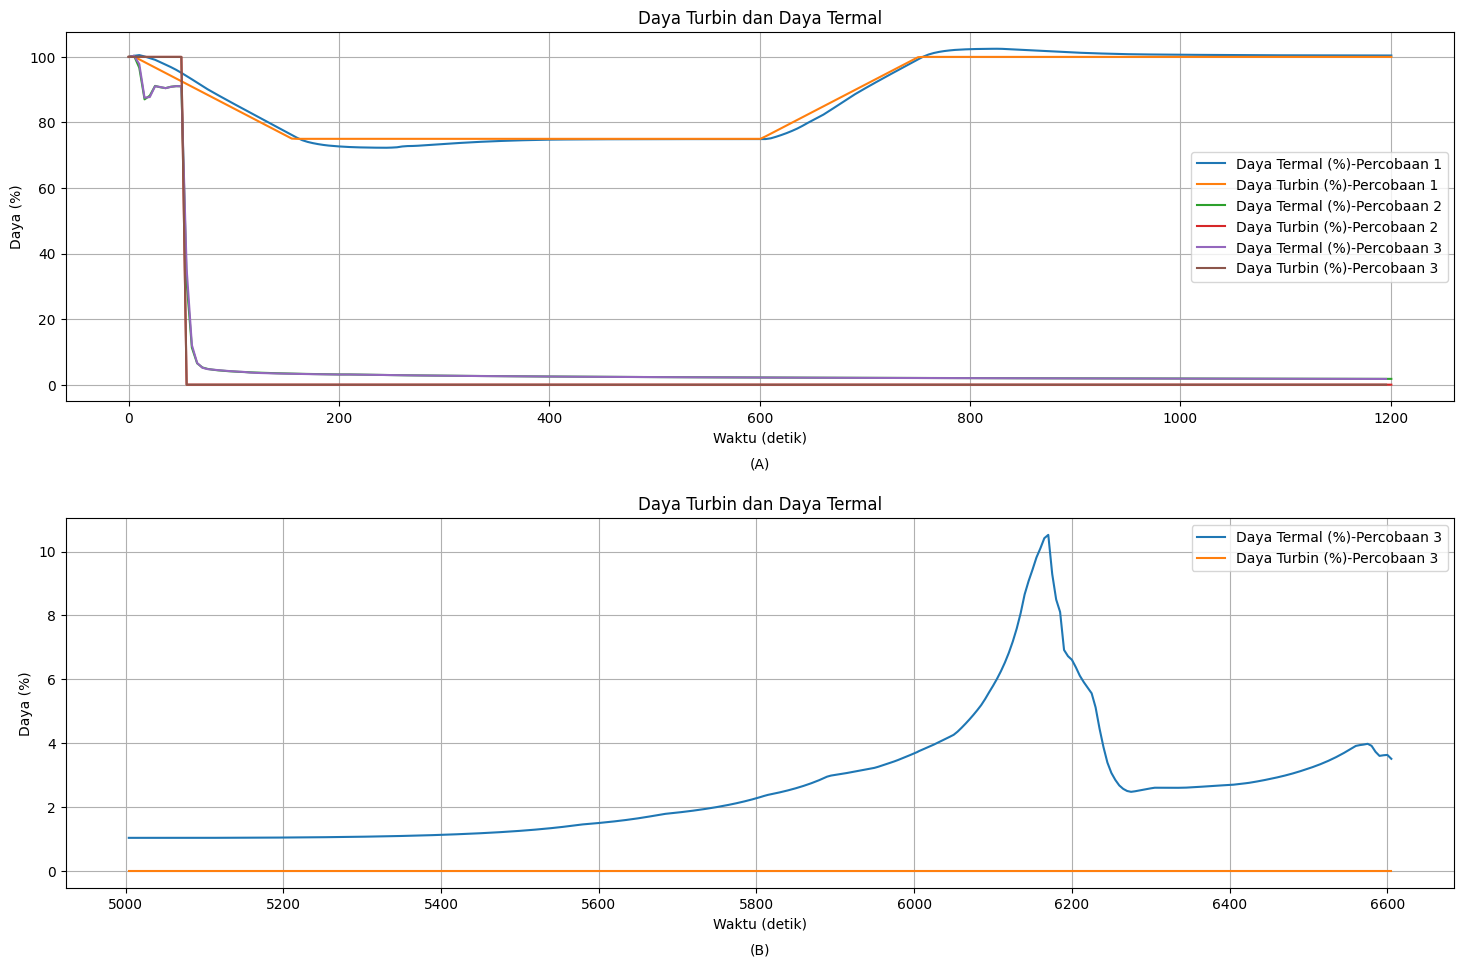

In [48]:
plt.figure(figsize=(15, 10))
# Plot A
file = files[0]
plt.subplot(2, 1, 1)
data = combined_df[combined_df['source_file'] == file]
plt.plot(data.TIME, data['PWR'], label=f'Daya Termal (%)-{file[:-5]}')
plt.plot(data.TIME, data['TBLD'], label=f'Daya Turbin (%)-{file[:-5]}')
plt.legend()
plt.grid(True)
# Plot B
file = files[1]
plt.subplot(2, 1, 1)
data = combined_df[combined_df['source_file'] == file]
plt.plot(data.TIME, data['PWR'], label=f'Daya Termal (%)-{file[:-5]}')
plt.plot(data.TIME, data['TBLD'], label=f'Daya Turbin (%)-{file[:-5]}')
plt.legend()
plt.grid(True)
plt.xlabel('Waktu (detik)')
plt.ylabel('Daya (%)')

# Plot C
file = files[2]
plt.subplot(2, 1, 1)
data = combined_df[combined_df['source_file'] == file]
data = data[(data['TIME'] <= 1200)]
plt.plot(data.TIME, data['PWR'], label=f'Daya Termal (%)-{file[:-5]}')
plt.plot(data.TIME, data['TBLD'], label=f'Daya Turbin (%)-{file[:-5]}')
plt.legend()
plt.title(f'Daya Turbin dan Daya Termal')
plt.text(0.5, -0.15, '(A)', ha='center', va='top', transform=plt.gca().transAxes) #Add (A) at bottom.
plt.grid(True)
# Plot C
file = files[2]
plt.subplot(2, 1, 2)
data = combined_df[combined_df['source_file'] == file]
data = data[(data['TIME'] >= 5000)]
plt.plot(data.TIME, data['PWR'], label=f'Daya Termal (%)-{file[:-5]}')
plt.plot(data.TIME, data['TBLD'], label=f'Daya Turbin (%)-{file[:-5]}')
plt.legend()
plt.title(f'Daya Turbin dan Daya Termal')
plt.text(0.5, -0.15, '(B)', ha='center', va='top', transform=plt.gca().transAxes) #Add (A) at bottom.
plt.xlabel('Waktu (detik)')
plt.ylabel('Daya (%)')

plt.tight_layout(pad=2.0)
plt.grid(True)

# Laju Alir Air Umpan dan Uap Air SG A (Gabungan)

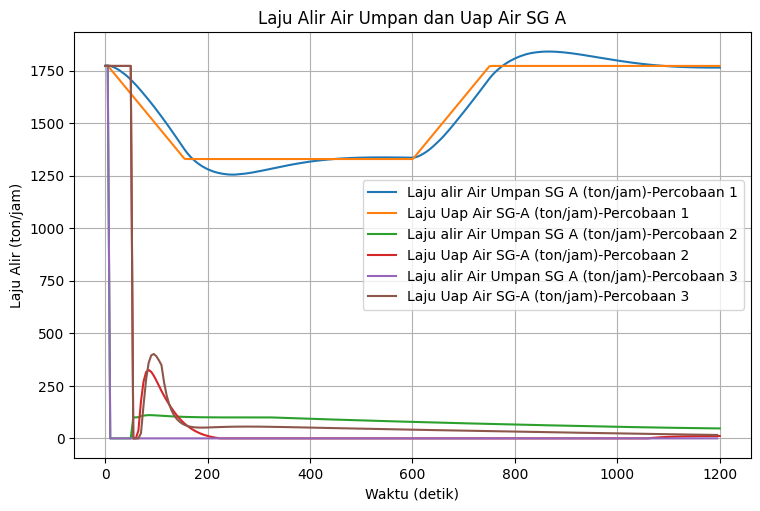

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

files = ['Percobaan 1.xlsx', 'Percobaan 2.xlsx', 'Percobaan 3.xlsx']
plt.figure(figsize=(15, 10))

# Plot A
file = files[0]
plt.subplot(2, 2, 1)
data = combined_df[combined_df['source_file'] == file]
plt.plot(data.TIME, data['WFWA'], label=f'Laju alir Air Umpan SG A (ton/jam)-{file[:-5]}')
plt.plot(data.TIME, data['WSTA'], label=f'Laju Uap Air SG-A (ton/jam)-{file[:-5]}')
plt.title(f'Laju Alir Air Umpan dan Uap Air SG A {file[:-5]}')
plt.legend()

# Plot B
file = files[1]
plt.subplot(2, 2, 1)
data = combined_df[combined_df['source_file'] == file]
plt.plot(data.TIME, data['WFWA'], label=f'Laju alir Air Umpan SG A (ton/jam)-{file[:-5]}')
plt.plot(data.TIME, data['WSTA'], label=f'Laju Uap Air SG-A (ton/jam)-{file[:-5]}')
plt.title(f'Laju Alir Air Umpan dan Uap Air SG A {file[:-5]}')
plt.legend()

# Plot C
file = files[2]
plt.subplot(2, 2, 1)
data = combined_df[combined_df['source_file'] == file]
data = data[(data['TIME'] <= 1200)]
plt.plot(data.TIME, data['WFWA'], label=f'Laju alir Air Umpan SG A (ton/jam)-{file[:-5]}')
plt.plot(data.TIME, data['WSTA'], label=f'Laju Uap Air SG-A (ton/jam)-{file[:-5]}')
plt.legend()
plt.xlabel('Waktu (detik)')
plt.ylabel('Laju Alir (ton/jam)')
plt.title(f'Laju Alir Air Umpan dan Uap Air SG A')
plt.grid(True)
plt.tight_layout(pad=2.0)
plt.show()

In [50]:
# Set max rows limit for Altair to handle your data
alt.data_transformers.disable_max_rows()

# Create a list to hold all charts
charts = []

# 1. Plot PWR and TBLD for each experiment
for file in excel_files:
    data = combined_df[combined_df['source_file'] == file]
    
    # Create a chart for each file
    chart = alt.Chart(data).encode(
        x=alt.X('TIME:Q', title='Time'),
        tooltip=['TIME:Q', 'PWR:Q', 'TBLD:Q']
    ).properties(
        title=f'Daya Turbin dan Daya Termal {file[:-5]}',
        height=250
    )
    
    # Add both lines to the chart
    line1 = chart.mark_line(color='blue').encode(
        y=alt.Y('PWR:Q', title='Power (%)'),
        tooltip=['PWR:Q']
    )
    
    line2 = chart.mark_line(color='red').encode(
        y=alt.Y('TBLD:Q', title='Turbine Power (%)'),
        tooltip=['TBLD:Q']
    )
    
    # Combine both lines with a legend
    combined = alt.layer(
        line1, line2
    ).resolve_scale(
        y='shared'
    ).properties(
        width=800
    ).interactive()
    
    charts.append(combined)

# 2. Plot WFWA and WSTA for each experiment
for file in excel_files:
    data = combined_df[combined_df['source_file'] == file]
    
    chart = alt.Chart(data).encode(
        x=alt.X('TIME:Q', title='Time'),
        tooltip=['TIME:Q', 'WFWA:Q', 'WSTA:Q']
    ).properties(
        title=f'Laju Alir Air Umpan dan Uap Air SG A {file[:-5]}',
        height=250
    )
    
    line1 = chart.mark_line(color='green').encode(
        y=alt.Y('WFWA:Q', title='Feed Flow Rate (ton/jam)'),
        tooltip=['WFWA:Q']
    )
    
    line2 = chart.mark_line(color='orange').encode(
        y=alt.Y('WSTA:Q', title='Steam Flow Rate (ton/jam)'),
        tooltip=['WSTA:Q']
    )
    
    combined = alt.layer(
        line1, line2
    ).resolve_scale(
        y='shared'
    ).properties(
        width=800
    ).interactive()
    
    charts.append(combined)

# 3. Plot LSGA for experiment 2
data = combined_df[combined_df['source_file'] == 'Percobaan 2.xlsx']
chart3 = alt.Chart(data).mark_line(color='purple').encode(
    x=alt.X('TIME:Q', title='Time'),
    y=alt.Y('LSGA:Q', title='Water Level (m)'),
    tooltip=['TIME:Q', 'LSGA:Q']
).properties(
    title='Perubahan Ketinggian Air SG-A (m) pada Percobaan 2',
    width=800,
    height=250
).interactive()
charts.append(chart3)

# 4. Plot P for experiment 3
data = combined_df[combined_df['source_file'] == 'Percobaan 3.xlsx']
chart4 = alt.Chart(data).mark_line().encode(
    x=alt.X('TIME:Q', title='Time'),
    y=alt.Y('P:Q', title='Pressure (bar)'),
    tooltip=['TIME:Q', 'P:Q']
).properties(
    title='Tekanan RCS (bar) pada Percobaan 3',
    width=800,
    height=250
).interactive()
charts.append(chart4)

# 5. Plot TPCT and TFPK for experiment 3
data = combined_df[combined_df['source_file'] == 'Percobaan 3.xlsx']
chart5 = alt.Chart(data).encode(
    x=alt.X('TIME:Q', title='Time'),
    tooltip=['TIME:Q', 'TPCT:Q', 'TFPK:Q']
).properties(
    title='Temperatur Puncak Kelongsong dan Bahan Bakar pada Percobaan 3',
    height=250
)

line1 = chart5.mark_line(color='red').encode(
    y=alt.Y('TPCT:Q', title='Temperature (C)')
)
line2 = chart5.mark_line(color='orange').encode(
    y=alt.Y('TFPK:Q')
)

chart5_combined = alt.layer(
    line1, line2
).resolve_scale(
    y='shared'
).properties(
    width=800
).interactive()
charts.append(chart5_combined)

# 6. Plot CNH2 for experiment 3
data = combined_df[combined_df['source_file'] == 'Percobaan 3.xlsx']
chart6 = alt.Chart(data).mark_line(color='blue').encode(
    x=alt.X('TIME:Q', title='Time'),
    y=alt.Y('CNH2:Q', title='Hydrogen Concentration (%)'),
    tooltip=['TIME:Q', 'CNH2:Q']
).properties(
    title='Konsentrasi Hidrogen (%) pada Percobaan 3',
    width=800,
    height=250
).interactive()
charts.append(chart6)

# Combine all charts vertically
final_chart = alt.vconcat(*charts)

# Display the chart
final_chart

alt.VConcatChart(...)